<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/DL_Assignment/blob/main/Coursera_Visualise_filters_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Filters of a CNN using TensorFlow
##GUIDED PROJECT
###**Visualize image features that maximally activate filters of a CNN**
###**Implement gradient ascent algorithm**


#**DOWNLOADING THE MODEL**

In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.8.0


In [4]:
#using vgg16 model
model=tf.keras.applications.vgg16.VGG16(
    include_top=False,   #finall fully connected cnn is not used
    weights='imagenet',   #downloading model with trained model on imagenet dataset
    input_shape=(96,96,3)
)
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

#**GET LAYER OUTPUT**
##GET SUBMODEL
###to get specific layer


In [5]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

In [6]:
  get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


#**Image Visualization**
* use the pretrained model vgg16 model of random image is ran.
* understand what the filter is for

In [7]:
def create_image():
  return tf.random.uniform((96,96,3),minval=-0.5,maxval=0.5)
#to plpot the image  
def plot_image(image, title='random'):

  image=image-tf.math.reduce_min(image)
  #we are subtracting bcos,if there are negative values if min then we add that to the image
  #to get positive values
  #then scale the image
  image=image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.title(title)
  plt.show()

In [8]:
# TO CREATE THE IMAGE
image=create_image()


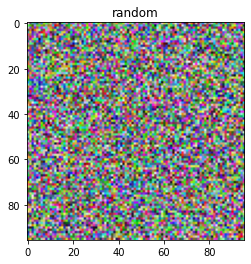

In [9]:
plot_image(image)

#**Training Loop**

In [10]:
#o get submodel and run iterations
def visualize_filter(layer_name,f_index=None,iters=50):
  submodel=get_submodel(layer_name)
  num_filters=submodel.output.shape[-1]
  if f_index is None:
    f_index=random.randint(0,num_filters-1)
  assert num_filters >f_index,'f_index is out of bounds'


  image =create_image()
  verbose_step=int(iters/10)
#to find gradient ascent
#to maximize the loss
#looking for maxima
#what is the image which maximises the output of submodel at particular index of filter
  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out=submodel(tf.expand_dims(image,axis=0))[:,:,:,f_index]
      #to get filter index from last index
      loss=tf.math.reduce_mean(out)

    grads=tape.gradient(loss,image)
    grads=tf.math.l2_normalize(grads)
    image+=grads*10

#if current iteration is divisible by verbose =0

    if (i+1)% verbose_step==0:
      print(f'Iterations :{i+1},Loss:{loss.numpy():.4f}')

    #can use large learning rate to increase the speed
  plot_image(image,f'{layer_name},{f_index}')


#**Final Results**

In [11]:
#print all the layers name
print ([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iterations :10,Loss:32.5036
Iterations :20,Loss:61.4300
Iterations :30,Loss:90.2669
Iterations :40,Loss:123.3952
Iterations :50,Loss:159.9460
Iterations :60,Loss:201.0385
Iterations :70,Loss:245.5992
Iterations :80,Loss:293.4164
Iterations :90,Loss:344.1427
Iterations :100,Loss:397.7555


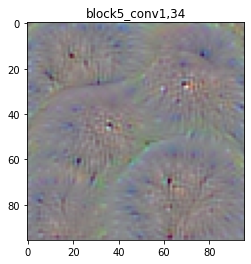

In [15]:
layer_name='block5_conv1' #@param['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name,iters=100)

34 th filter has maximal activaled,
thus visualizing the filters

#Tensorflow Gradient Tape
**The gradient tape is a powerfull concept in tensorflow which allow us to wtite the custom training loops while calculating automatic differentiation (computational differentation). The Automatic (computational) differentiation is fast and efficient way to compute partial derivatives using chain rules with simple aritmatic operations**

In [8]:
x = tf.convert_to_tensor(2.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x -2
    z = y * x

grads = tape.gradient(z, x)

In [9]:
print(y)
print(z)
print(x)
print(grads)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)


# **so , to calculate the gradient,**
>   y = x * x -2

>    z = y * x
##substitute for for y in z with x

### dz/dx=d((x^2-2)*x)/dx
### =d(x^3-2*x)/dx
### =3x^2-2=12-2=10


---


